# Prática WTISC 2023

## Importação de bibliotecas

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Carregamento dos dados a partir de arquivo armazenado no GitHub

In [2]:
url_arquivo = 'https://raw.githubusercontent.com/regispires/minicurso-ia-wtisc-2023/main/datasets/healthcare-dataset-stroke-data-mini.csv'
df = pd.read_csv(url_arquivo)

## Análise exploratória dos dados

In [3]:
df

,age,avg_glucose_level,stroke
0,3.0,95.12,0
1,58.0,87.96,0
2,8.0,110.89,0
3,70.0,69.04,0
4,14.0,161.28,0
...,...,...,...
95,76.0,243.58,1
96,75.0,109.78,1
97,58.0,107.26,1
98,81.0,99.33,1


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    float64
 1   avg_glucose_level  100 non-null    float64
 2   stroke             100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.describe()

,age,avg_glucose_level,stroke
count,100.000000,100.000000,100.000000
mean,55.850000,128.208900,0.500000
std,21.288008,60.083696,0.502519
min,3.000000,55.420000,0.000000
25%,44.750000,79.650000,0.000000
50%,59.000000,103.690000,0.500000
75%,74.000000,192.192500,1.000000
max,82.000000,252.720000,1.000000


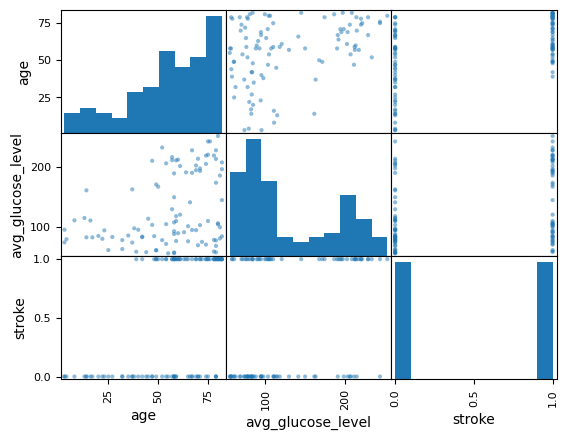

In [7]:
pd.plotting.scatter_matrix(df);

## Como gerar um CSV a partir do DataFrame
Para armazenar em um arquivo, bastaria adicionar um parâmetro com o nome do arquivo.

In [8]:
print(df.to_csv(index=False))

age,avg_glucose_level,stroke
3.0,95.12,0
58.0,87.96,0
8.0,110.89,0
70.0,69.04,0
14.0,161.28,0
47.0,210.95,0
52.0,77.59,0
75.0,243.53,0
32.0,77.67,0
74.0,205.84,0
79.0,77.08,0
79.0,57.08,0
37.0,162.96,0
37.0,73.5,0
40.0,95.04,0
35.0,85.37,0
20.0,84.62,0
42.0,82.67,0
44.0,57.33,0
79.0,67.84,0
65.0,75.7,0
57.0,129.54,0
49.0,60.22,0
71.0,198.21,0
59.0,109.82,0
25.0,60.84,0
67.0,94.61,0
38.0,97.49,0
54.0,206.72,0
70.0,214.45,0
27.0,82.9,0
47.0,103.26,0
58.0,55.78,0
3.0,73.74,0
58.0,149.75,0
14.0,82.34,0
32.0,62.6,0
23.0,94.09,0
55.0,55.42,0
17.0,82.18,0
59.0,117.92,0
13.0,114.84,0
4.0,79.17,0
16.0,110.63,0
67.0,190.7,0
22.0,79.81,0
45.0,113.63,0
66.0,141.24,0
58.0,56.96,0
69.0,203.04,0
67.0,228.69,1
61.0,202.21,1
80.0,105.92,1
49.0,171.23,1
79.0,174.12,1
81.0,186.21,1
74.0,70.09,1
69.0,94.39,1
59.0,76.15,1
78.0,58.57,1
81.0,80.43,1
61.0,120.46,1
54.0,104.51,1
78.0,219.84,1
79.0,214.09,1
50.0,167.41,1
64.0,191.61,1
75.0,221.29,1
60.0,89.22,1
57.0,217.08,1
71.0,193.94,1
52.0,233.29,1
79.0,228

## Visualização dos dados

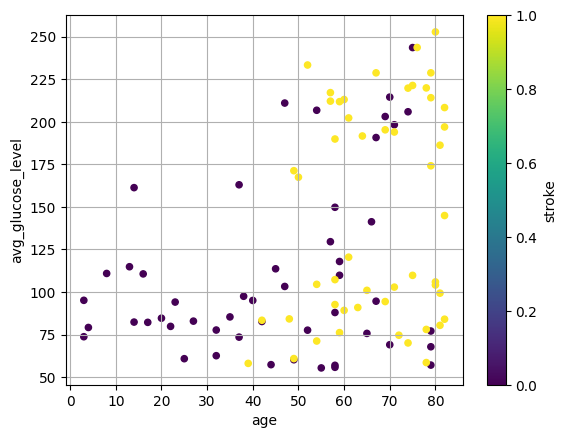

In [9]:
df.plot.scatter(x='age', y='avg_glucose_level', c='stroke', colormap='viridis', grid=True);

## Definição de features (atributos, características, X) e rótulos (targets, y)

In [10]:
X = df.drop('stroke', axis=1)
y = df['stroke']

## Instanciação do Modelo kNN com o hiperparâmetro k=3

In [11]:
model = KNeighborsClassifier(n_neighbors=3)

## Treinamento do modelo com todos os dados disponíveis

*   Item da lista
*   Item da lista



In [12]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

## Realizando uma predição para idade=40 e nível de glicose médio=160

In [13]:
model.predict([[40, 160]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## Divisão do conjunto de dados em conjunto de treino e conjunto de teste
A divisão é feita de forma estratificada (_stratify=y_) para que o mesmo percentual de cada classe existente no conjunto de dados completo também ocorra nos conjuntos de treino e teste.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: stroke, Length: 100, dtype: int64

In [16]:
y_train

61    1
71    1
15    0
65    1
99    1
     ..
24    0
29    0
55    1
1     0
32    0
Name: stroke, Length: 75, dtype: int64

### Percentual de cada classe no conjunto de dados completo

In [17]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: stroke, dtype: float64

### Percentual de cada classe no conjunto de treino

In [18]:
y_train.value_counts(normalize=True)

1    0.506667
0    0.493333
Name: stroke, dtype: float64

### Percentual de cada classe no conjunto de teste

In [19]:
y_test.value_counts(normalize=True)

0    0.52
1    0.48
Name: stroke, dtype: float64

## Instanciação do Modelo kNN com o hiperparâmetro k=3

In [20]:
model = KNeighborsClassifier(n_neighbors=3)

## Treinamento do modelo com os dados do conjunto de treino

In [21]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predição dos rótulos para os dados do conjunto de treino

In [22]:
y_pred = model.predict(X_train)

## Cálculo da acurácia do modelo para o conjunto de treino

In [23]:
(y_train == y_pred).sum() / y_train.shape[0]

0.8266666666666667

## Cálculo da acurácia do modelo para o conjunto de treino usando a biblioteca Scikit Learn

In [24]:
accuracy_score(y_train, y_pred)

0.8266666666666667

## Cálculo da métrica _F1 Score_ para o conjunto de treino usando a biblioteca Scikit Learn

In [25]:
f1_score(y_train, y_pred)

0.8311688311688312

## Mostrando um relatório com algumas métricas de classificação sobre o conjunto de treino

In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.82      0.84      0.83        38

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



## Instanciação do Modelo kNN com o hiperparâmetro k=3

In [27]:
model = KNeighborsClassifier(n_neighbors=3)

## Treinamento do modelo com os dados do conjunto de teste

In [28]:
model.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=3)

## Predição dos rótulos para os dados do conjunto de teste

In [29]:
y_pred = model.predict(X_test)

## Cálculo da acurácia do modelo para o conjunto de teste usando a biblioteca Scikit Learn

In [30]:
accuracy_score(y_test, y_pred)

0.72

## Cálculo da métrica _F1 Score_ para o conjunto de teste usando a biblioteca Scikit Learn

In [31]:
f1_score(y_test, y_pred)

0.7407407407407408

## Mostrando um relatório com algumas métricas de classificação sobre o conjunto de teste

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.67      0.83      0.74        12

    accuracy                           0.72        25
   macro avg       0.73      0.72      0.72        25
weighted avg       0.74      0.72      0.72        25

